In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/vflip_IMG20241207121527.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/original_IMG20241207154249.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/original_IMG20241207135124.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/original_IMG20241207152943.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/original_IMG20241207153409.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset/Leaf_Spot_Diesase_Ring_Present/vflip_IMG20241207115347.jpg
/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmente

Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 368s 756ms/step - accuracy: 0.6069 - loss: 1.1101 - val_accuracy: 0.8228 - val_loss: 0.4651
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 96s 330ms/step - accuracy: 0.8643 - loss: 0.3668 - val_accuracy: 0.8663 - val_loss: 0.3399
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 333ms/step - accuracy: 0.9227 - loss: 0.2201 - val_accuracy: 0.8923 - val_loss: 0.2914
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 95s 328ms/step - accuracy: 0.9476 - loss: 0.1519 - val_accuracy: 0.9032 - val_loss: 0.2397
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 95s 328ms/step - accuracy: 0.9640 - loss: 0.1026 - val_accuracy: 0.9110 - val_loss: 0.2457
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 95s 328ms/step - accuracy: 0.9685 - loss: 0.0922 - val_accuracy: 0.9058 - val_loss: 0.2609
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 333ms/step - accuracy: 0.9788 - loss: 0.0625 - val_accuracy: 0.8984 - val_loss: 0.3261
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 99s 339ms/step - accuracy: 0.9780 - loss: 0.0647 - va

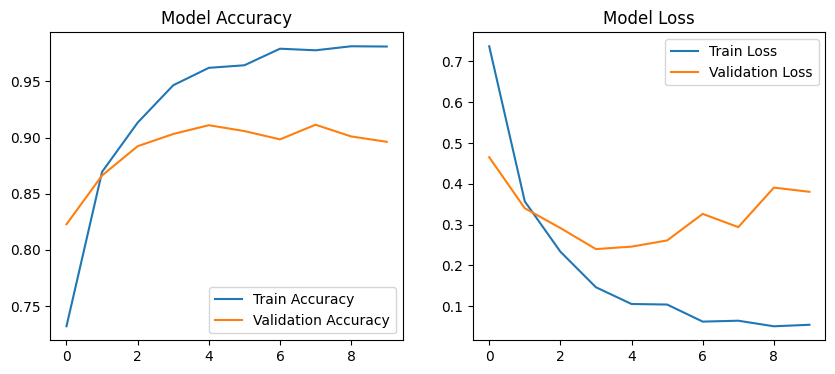

Model training completed. Results saved in 'classification results' folder.


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "DenseNet_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "DenseNet_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "DenseNet_training_plot.png"))
plt.show()

print("Model training completed. Results saved in 'classification results' folder.")

Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 108s 218ms/step - accuracy: 0.5354 - loss: 1.2917 - val_accuracy: 0.3422 - val_loss: 2.6955
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 43s 148ms/step - accuracy: 0.8411 - loss: 0.4225 - val_accuracy: 0.3478 - val_loss: 2.9574
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 0.9003 - loss: 0.2611 - val_accuracy: 0.5710 - val_loss: 1.8716
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9461 - loss: 0.1498 - val_accuracy: 0.6652 - val_loss: 1.3205
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9635 - loss: 0.1114 - val_accuracy: 0.6865 - val_loss: 1.2236
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 125ms/step - accuracy: 0.9741 - loss: 0.0813 - val_accuracy: 0.7299 - val_loss: 1.1860
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 35s 121ms/step - accuracy: 0.9715 - loss

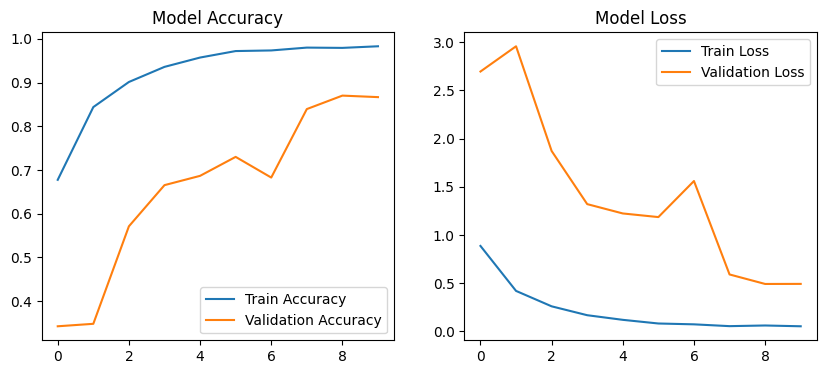

MobileNetV2 training completed. Results saved in 'classification results' folder.


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2  # Import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "MobileNet_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "MobileNet_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "MobileNet_training_plot.png"))
plt.show()

print("MobileNetV2 training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 260s 703ms/step - accuracy: 0.5664 - loss: 1.1873 - val_accuracy: 0.8558 - val_loss: 0.3536
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 164s 567ms/step - accuracy: 0.8879 - loss: 0.2969 - val_accuracy: 0.8780 - val_loss: 0.3152
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 165s 571ms/step - accuracy: 0.9587 - loss: 0.1132 - val_accuracy: 0.9071 - val_loss: 0.2707
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 165s 570ms/step - accuracy: 0.9754 - loss: 0.0685 - val_accuracy: 0.9106 - val_loss: 0.2769
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 165s 571ms/step - accuracy: 0.9797 - loss: 0.0620 - val_accuracy: 0.9188 - val_loss: 0.2611
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 165s 569ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9045 - val_loss: 0.3320
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 165s 570ms/step - accuracy: 0.987

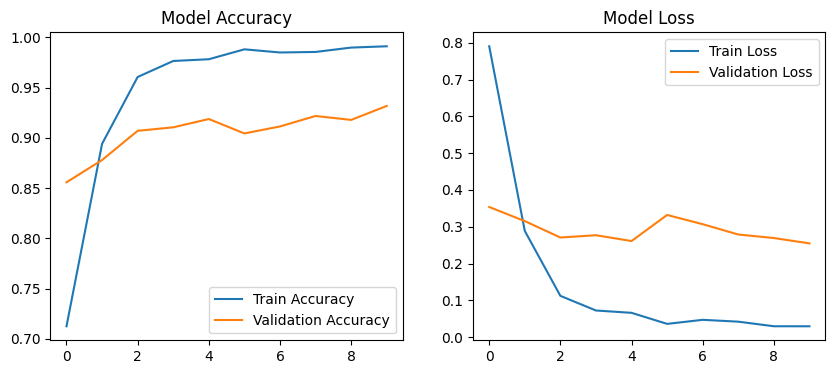

Xception training completed. Results saved in 'classification results' folder.


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "Xception_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "Xception_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "Xception_training_plot.png"))
plt.show()

print("Xception training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 259s 729ms/step - accuracy: 0.4018 - loss: 1.5899 - val_accuracy: 0.7868 - val_loss: 0.5530
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 162s 560ms/step - accuracy: 0.7699 - loss: 0.6088 - val_accuracy: 0.8263 - val_loss: 0.4604
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 162s 560ms/step - accuracy: 0.8352 - loss: 0.4267 - val_accuracy: 0.7977 - val_loss: 0.5068
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 163s 561ms/step - accuracy: 0.8463 - loss: 0.3938 - val_accuracy: 0.8233 - val_loss: 0.4694
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 162s 559ms/step - accuracy: 0.8693 - loss: 0.3341 - val_accuracy: 0.8580 - val_loss: 0.3500
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 162s 560ms/step - accuracy: 0.8906 - loss: 0.2823 - val_accuracy: 0.8402 - val_loss: 0.4649
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 162s 558ms/step - accuracy: 0.885

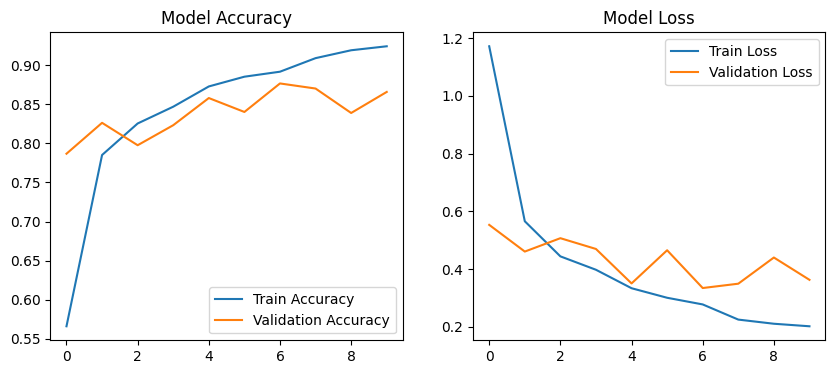

VGG16 training completed. Results saved in 'classification results' folder.


In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "VGG16_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "VGG16_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "VGG16_training_plot.png"))
plt.show()

print("VGG16 training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step - accuracy: 0.2727 - loss: 1.8964 - val_accuracy: 0.4577 - val_loss: 1.4037
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - accuracy: 0.4637 - loss: 1.4169 - val_accuracy: 0.5345 - val_loss: 1.2532
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.5416 - loss: 1.2380 - val_accuracy: 0.5853 - val_loss: 1.1535
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.6060 - loss: 1.0880 - val_accuracy: 0.6175 - val_loss: 1.0351
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.6326 - loss: 1.0033 - val_accuracy: 0.6366 - val_loss: 0.9732
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.6742 - loss: 0.8899 - val_accuracy: 0.6474 - val_loss: 0.9330
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.6888 - loss: 0.8368 - val_accuracy: 0.6630 - val_loss: 0.8968
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.7178 - loss: 0.7685 - val_accura

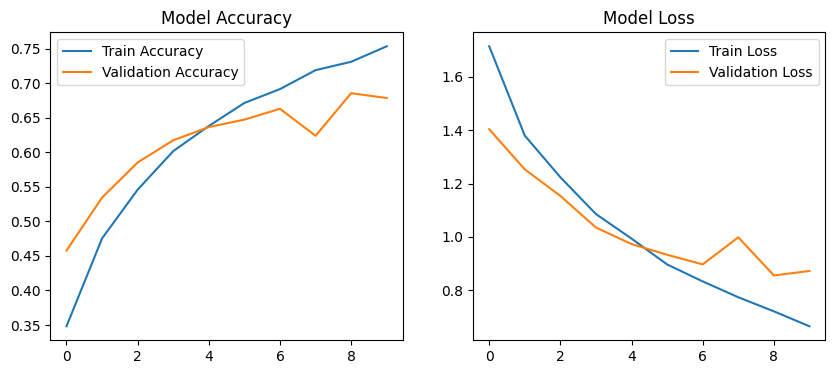

Custom CNN training completed. Results saved in 'classification results' folder.


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Custom CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "Custom_CNN_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "Custom_CNN_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "Custom_CNN_training_plot.png"))
plt.show()

print("Custom CNN training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 202s 432ms/step - accuracy: 0.5961 - loss: 1.1413 - val_accuracy: 0.8376 - val_loss: 0.4006
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 72s 248ms/step - accuracy: 0.8750 - loss: 0.3436 - val_accuracy: 0.8619 - val_loss: 0.3775
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 72s 249ms/step - accuracy: 0.9345 - loss: 0.1913 - val_accuracy: 0.8689 - val_loss: 0.3300
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 72s 249ms/step - accuracy: 0.9562 - loss: 0.1228 - val_accuracy: 0.8880 - val_loss: 0.3321
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 73s 250ms/step - accuracy: 0.9528 - loss: 0.1368 - val_accuracy: 0.9006 - val_loss: 0.2927
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 73s 250ms/step - accuracy: 0.9769 - loss: 0.0689 - val_accuracy: 0.8871 - val_loss: 0.3865
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 74s 254ms/step - accuracy: 0.9720 - lo

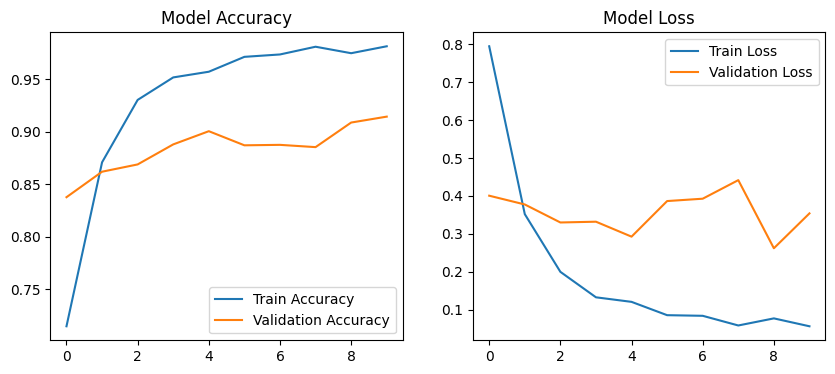

Model training completed. Results saved in 'classification results' folder.


In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "InceptionV3_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "InceptionV3_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "InceptionV3_training_plot.png"))
plt.show()

print("Model training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 189s 452ms/step - accuracy: 0.6091 - loss: 1.0805 - val_accuracy: 0.1164 - val_loss: 17.2134
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 334ms/step - accuracy: 0.8658 - loss: 0.3452 - val_accuracy: 0.1667 - val_loss: 15.1542
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 334ms/step - accuracy: 0.9199 - loss: 0.2202 - val_accuracy: 0.4577 - val_loss: 1.6528
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 335ms/step - accuracy: 0.9510 - loss: 0.1373 - val_accuracy: 0.7460 - val_loss: 1.0043
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 336ms/step - accuracy: 0.9640 - loss: 0.1113 - val_accuracy: 0.8389 - val_loss: 0.5307
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 97s 336ms/step - accuracy: 0.9720 - loss: 0.0849 - val_accuracy: 0.8680 - val_loss: 0.5642
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 98s 336ms/step - accuracy: 0.9746 - 

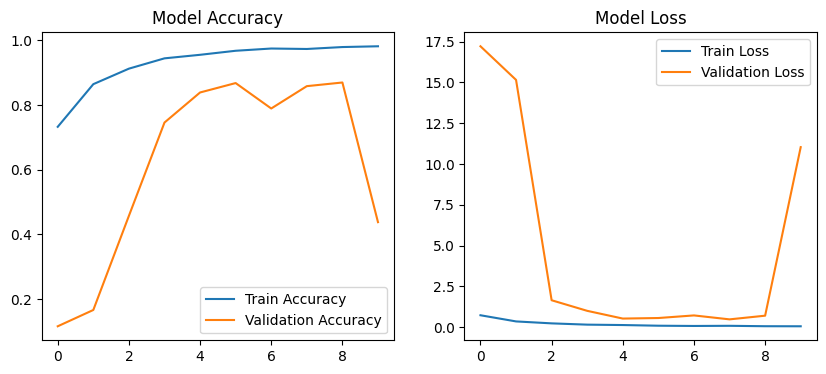

Model training completed. Results saved in 'classification results' folder.


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "ResNet50_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "ResNet50_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "ResNet50_training_plot.png"))
plt.show()

print("Model training completed. Results saved in 'classification results' folder.")


Found 9225 images belonging to 8 classes.
Found 2303 images belonging to 8 classes.
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 173s 330ms/step - accuracy: 0.4961 - loss: 1.3964 - val_accuracy: 0.7508 - val_loss: 0.6653
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 43s 147ms/step - accuracy: 0.8054 - loss: 0.5013 - val_accuracy: 0.8185 - val_loss: 0.4647
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.8612 - loss: 0.3585 - val_accuracy: 0.7916 - val_loss: 0.5555
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.8958 - loss: 0.2753 - val_accuracy: 0.8519 - val_loss: 0.3965
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9292 - loss: 0.2004 - val_accuracy: 0.8628 - val_loss: 0.3914
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9463 - loss: 0.1416 - val_accuracy: 0.5918 - val_loss: 1.2620
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9622 - lo

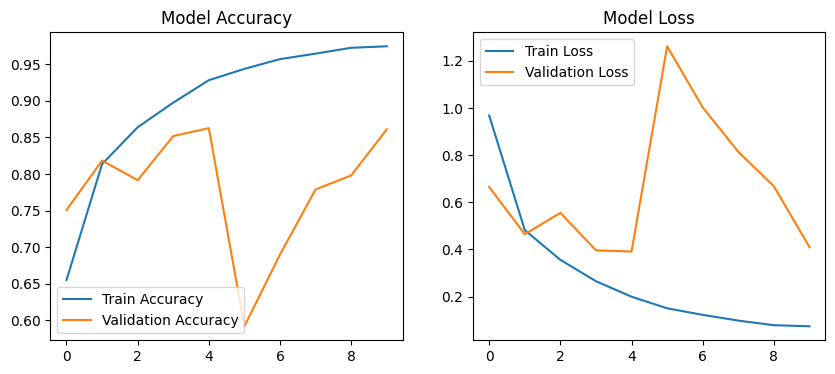

Model training completed. Results saved in 'classification results' folder.


In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import json

# Define paths
dataset_path = "/kaggle/input/8-classes-augmented-classfication-dataset/224 224 8 classes augmented dataset"
results_path = "/kaggle/working/Classfication results"
os.makedirs(results_path, exist_ok=True)

# Image preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load EfficientNetV2B0 model
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save(os.path.join(results_path, "EfficientNetV2B0_model.h5"))

# Save results
results = {
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(os.path.join(results_path, "EfficientNetV2B0_results.json"), "w") as f:
    json.dump(results, f, indent=4)

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.savefig(os.path.join(results_path, "EfficientNetV2B0_training_plot.png"))
plt.show()

print("Model training completed. Results saved in 'classification results' folder.")


In [11]:
!zip -r working_files.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/Classfication results/ (stored 0%)
  adding: kaggle/working/Classfication results/ResNet50_results.json (deflated 62%)
  adding: kaggle/working/Classfication results/MobileNet_training_plot.png (deflated 7%)
  adding: kaggle/working/Classfication results/Custom_CNN_model.h5 (deflated 28%)
  adding: kaggle/working/Classfication results/ResNet50_model.h5 (deflated 8%)
  adding: kaggle/working/Classfication results/Xception_results.json (deflated 62%)
  adding: kaggle/working/Classfication results/EfficientNetV2B0_results.json (deflated 62%)
  adding: kaggle/working/Classfication results/InceptionV3_results.json (deflated 62%)
  adding: kaggle/working/Classfication results/Custom_CNN_results.json (deflated 61%)
  adding: kaggle/working/Classfication results/VGG16_results.json (deflated 62%)
  adding: kaggle/working/Classfication results/InceptionV3_training_plot.png (deflated 7%)
  adding: kaggle/working/Classfication results/

In [ ]:
kaggle kernels output nafizf/8-classes-augmented-classfications -p /path/to/dest